# PROJECT - Gaming Anxiety Data 

# Part 1: Data Cleaning and Pre-processing

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import shapely

In [ ]:
# Importing dataset
from google.colab import files
df = pd.read_excel("GamingStudy_data.xlsx")
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


### Finding null values

In [ ]:
# Determining count of null values in each column
df_null_count = df.isnull().sum()
print(df_null_count)

# Dropping columns with null values greater than 75% 
df= df.dropna(how = 'any', axis=1,thresh= df.shape[0]*0.75)

S. No.                 0
Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175


In [ ]:
# Distribution of different columns

print('GADE',"\n",df['GADE'].value_counts(), "\n")
print('Platform',"\n",(df['Platform'].value_counts()/df['Platform'].count())*100, "\n")
print('earnings',"\n",(df['earnings'].value_counts()/df['earnings'].count())*100, "\n")
print('whyplay',"\n",(df['whyplay'].value_counts()/df['whyplay'].count())*100, "\n")
print('Work',"\n",(df['Work'].value_counts()/df['Work'].count())*100, "\n")
print('Playstyle',"\n",(df['Playstyle'].value_counts()/df['Playstyle'].count())*100, "\n")

GADE 
 Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64 

Platform 
 PC                         98.180333
Console (PS, Xbox, ...)     1.648841
Smartphone / Tablet         0.170826
Name: Platform, dtype: float64 

earnings 
 I play for fun                                                                               89.958408
I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)     7.352941
I earn a living by playing this game                                                          0.356506
I play to win                                                                                 0.022282
i try                                                                                         0.014854
                                                                                               ...    
I play for fun, but if there's an opportunity to earn some money, 

##Imputing values in place of null values

In [ ]:
df_imputed = df

In [ ]:
# 1. Imputing 'GADE' with most common class 
df_imputed['GADE'] = df['GADE'].fillna(df['GADE'].value_counts().index[0])
df_imputed

# 2. Imputing 'Hours' with the median as it is not skewed (not with mean) and median = mode
df_imputed['Hours'] = df['Hours'].fillna(df['Hours'].median())
df_imputed

# 3. Imputing 'streams' with the median as it is not skewed (not with mean)
df_imputed['streams'] = df['streams'].fillna(df['streams'].median())

# 4. Imputing all 'SPIN' with the median
cols = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9','SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17']
for col in cols:
  df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())  

# 5. Imputing 'Narcissism' with the median
df_imputed['Narcissism'] = df['Narcissism'].fillna(df['Narcissism'].median())

# 6. Imputing 'Work' with 'Unknown' 
df_imputed['Work'] = df['Work'].fillna("Unknown")


# 7. Imputing in 'SPIN_T' sum of all SPIN values in place of NULL values
df['SPIN_T'] = df['SPIN1'] + df['SPIN2']+ df['SPIN3']+ df['SPIN4']+ df['SPIN5']+ df['SPIN6']+ df['SPIN7']+ df['SPIN8']+ df['SPIN9']+ df['SPIN10']+ df['SPIN11']+ df['SPIN12']+ df['SPIN13']+ df['SPIN14']+ df['SPIN15']+ df['SPIN16']+ df['SPIN17']




In [ ]:
# Dropping unhelpful columns
df = df.drop(['League', 'Reference', 'accept', 'Residence_ISO3', 'Birthplace_ISO3'], axis=1)
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Gender,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,SWL_T,SPIN_T
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Singleplayer,1,23,5.0
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Multiplayer - online - with strangers,8,16,33.0
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Singleplayer,8,17,31.0
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,Male,28,Employed,Bachelor (or equivalent),USA,USA,Multiplayer - online - with online acquaintanc...,0,17,11.0
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Multiplayer - online - with strangers,14,14,13.0


In [ ]:
# Checking if all null values have been imputed or removed

df_null_count = df.isnull().sum()
print(df_null_count)

S. No.        0
Timestamp     0
GAD1          0
GAD2          0
GAD3          0
GAD4          0
GAD5          0
GAD6          0
GAD7          0
GADE          0
SWL1          0
SWL2          0
SWL3          0
SWL4          0
SWL5          0
Game          0
Platform      0
Hours         0
earnings      0
whyplay       0
streams       0
SPIN1         0
SPIN2         0
SPIN3         0
SPIN4         0
SPIN5         0
SPIN6         0
SPIN7         0
SPIN8         0
SPIN9         0
SPIN10        0
SPIN11        0
SPIN12        0
SPIN13        0
SPIN14        0
SPIN15        0
SPIN16        0
SPIN17        0
Narcissism    0
Gender        0
Age           0
Work          0
Degree        0
Birthplace    0
Residence     0
Playstyle     0
GAD_T         0
SWL_T         0
SPIN_T        0
dtype: int64


# Removing outliers

In [ ]:
# Checking for outliers
df.describe()
# We can see that Hours have a max value of 8000 which does not make sense in the dataset.


,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,...,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T
count,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,...,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000
mean,7096.839201,42054.841222,0.860963,0.673351,0.965761,0.724079,0.488042,0.911022,0.588755,3.720440,...,0.531343,1.249480,1.406566,0.613859,0.923797,2.027629,20.930407,5.211973,19.788844,19.804070
std,4114.478220,0.272948,0.926542,0.915724,0.982776,0.921971,0.837014,0.931168,0.894408,1.736264,...,0.939718,1.200751,1.343164,0.958759,1.177540,1.060935,3.300897,4.713267,7.229243,13.366174
min,1.000000,42052.004370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,5.000000,0.000000
25%,3532.750000,42054.716548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,2.000000,14.000000,10.000000
50%,7087.500000,42054.800675,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,20.000000,4.000000,20.000000,17.000000
75%,10654.250000,42054.932112,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,22.000000,8.000000,26.000000,28.000000
max,14250.000000,42058.363750,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,63.000000,21.000000,35.000000,68.000000


In [ ]:
#1. Hours
# Finding the limits of acceptable hours and streams values using IQR
Q1 = df['Hours'].quantile(0.25)
Q3 = df['Hours'].quantile(0.75)
IQR = Q3-Q1
print('IQR = ', IQR, "\n") # = 16

lower_lim = 0
upper_lim = Q3 + 4 * IQR

print("lower limit = ", lower_lim, "\n")
print("upper limit = ", upper_lim, "\n")

outliers_low = (df['Hours'] < lower_lim)
outliers_up = (df['Hours'] > upper_lim)

# records removed due to outliers
len(df['Hours'][outliers_low]) + len(df['Hours'][outliers_up])

# Removing Hours outliers

df = df[~(outliers_low | outliers_up)]
df.describe()

IQR =  16.0 

lower limit =  0 

upper limit =  92.0 



,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,...,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T
count,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,...,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000,13432.000000
mean,7093.468508,42054.841062,0.860929,0.672945,0.965679,0.723049,0.487418,0.909395,0.587701,3.721486,...,0.529482,1.248809,1.405971,0.611971,0.923020,2.026281,20.928827,5.207117,19.797871,19.793553
std,4114.526018,0.273060,0.926059,0.915223,0.982203,0.920718,0.836045,0.930091,0.893006,1.735102,...,0.936615,1.199437,1.342236,0.956020,1.176559,1.059391,3.291600,4.706546,7.222524,13.350435
min,1.000000,42052.004370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,5.000000,0.000000
25%,3527.750000,42054.716387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,2.000000,14.000000,10.000000
50%,7081.500000,42054.800540,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,20.000000,4.000000,20.000000,17.000000
75%,10649.250000,42054.931805,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,22.000000,8.000000,26.000000,28.000000
max,14250.000000,42058.363750,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,63.000000,21.000000,35.000000,68.000000


# Data Exploration for feature selection

In [ ]:
df.columns

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'streams', 'SPIN1', 'SPIN2',
       'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10',
       'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Birthplace',
       'Residence', 'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T'],
      dtype='object')

In [ ]:
# Removing columns that are not needed
df_features = df[['Game', 'Platform', 'Hours', 'GADE', 'Gender', 'Age', 'Work', 'Degree','Narcissism', 'GAD_T', 'SWL_T', 'SPIN_T']].copy()
df_features

,Game,Platform,Hours,GADE,Gender,Age,Work,Degree,Narcissism,GAD_T,SWL_T,SPIN_T
0,Skyrim,"Console (PS, Xbox, ...)",15.0,Not difficult at all,Male,25,Unemployed / between jobs,Bachelor (or equivalent),1.0,1,23,5.0
1,Other,PC,8.0,Somewhat difficult,Male,41,Unemployed / between jobs,Bachelor (or equivalent),1.0,8,16,33.0
2,Other,PC,0.0,Not difficult at all,Female,32,Employed,Bachelor (or equivalent),4.0,8,17,31.0
3,Other,PC,20.0,Not difficult at all,Male,28,Employed,Bachelor (or equivalent),2.0,0,17,11.0
4,Other,"Console (PS, Xbox, ...)",20.0,Very difficult,Male,19,Employed,High school diploma (or equivalent),1.0,14,14,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13459,Other,"Console (PS, Xbox, ...)",40.0,Not difficult at all,Male,22,Student at college / university,Master (or equivalent),3.0,4,28,7.0
13460,League of Legends,PC,20.0,Extremely difficult,Female,20,Student at college / university,High school diploma (or equivalent),2.0,20,23,25.0
13461,Starcraft 2,PC,20.0,Not difficult at all,Male,19,Student at college / university,High school diploma (or equivalent),2.0,0,32,10.0
13462,Other,"Console (PS, Xbox, ...)",5.0,Somewhat difficult,Female,18,Student at school,High school diploma (or equivalent),2.0,13,16,32.0


# Part 2: Data Exploration and Feature Selection

1. Relation between different attributes

Text(0.5, 1.0, 'Heatmap')

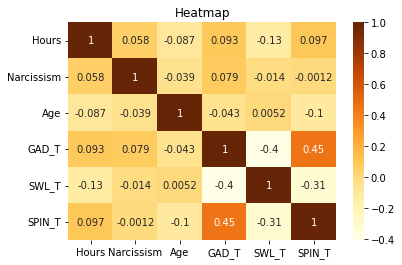

In [ ]:
## CORRELATION PLOT

corr_list=df_features[['Hours','Narcissism','Age', 'GAD_T', 'SWL_T', 'SPIN_T']]
corr_list
sns.heatmap(corr_list.corr(), annot = True ,cmap= 'YlOrBr') ## blues, mako
plt.title("Heatmap")

2. Treemap of average hours spent by gamers based on employment and gender 

In [ ]:
## treemap of employment count m/f and avg no. of hours
import plotly.express as px
fig = px.treemap(df_features, path=[px.Constant("Work"), 'Work', 'Gender'], values='Hours')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),
                title_text = 'Hours spent based on Employment Status and Gender')
fig.show()


3. SPIN vs hours 

Text(0.5, 1.0, ' Social Phobia Inventory score by Hours ')

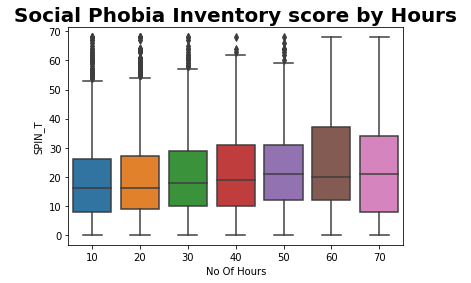

In [ ]:
#BOX PLOT 
# box plot for all scores m/f


bins = [0, 10,20,30,40,50,60,70]
labels = ['10','20','30','40','50','60','70']

df_features['No Of Hours'] = pd.cut(df_features['Hours'], bins=bins, labels=labels)
#df['No Of Hours'].unique()
sns.boxplot(x=df_features["No Of Hours"], y=df_features["SPIN_T"])
plt.title(" Social Phobia Inventory score by Hours ", fontsize = 20, fontweight= 'bold')

4. SWL vs hours

Text(0.5, 1.0, ' Satisfaction with Life scores by Hours ')

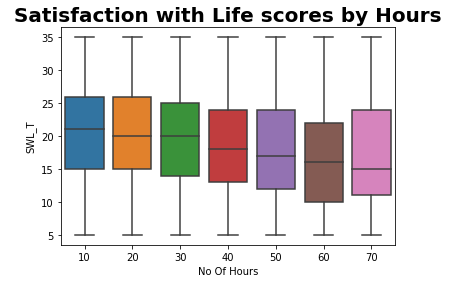

In [ ]:
#BOX plot

bins = [0, 10,20,30,40,50,60,70]
labels = ['10','20','30','40','50','60','70']

df_features['No Of Hours'] = pd.cut(df_features['Hours'], bins=bins, labels=labels)
sns.boxplot(x=df_features["No Of Hours"], y=df_features["SWL_T"])
plt.title(" Satisfaction with Life scores by Hours ", fontsize = 20, fontweight= 'bold')

5. Bar chart of people with a degree

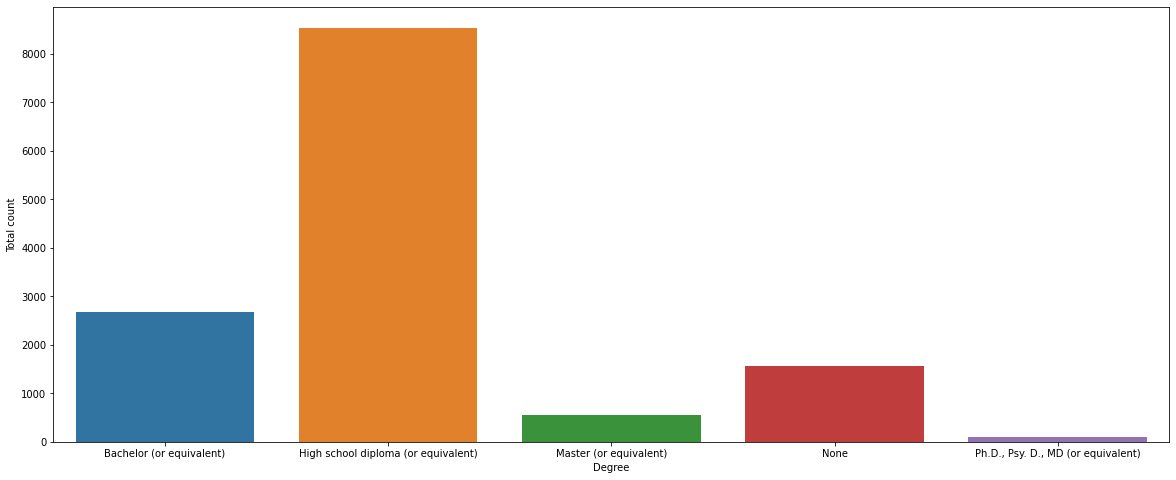

In [ ]:
#Bar chart

df_group1=df_features.groupby(['Degree']).size().reset_index(name='Total count')
df_group1

plt.figure(figsize=(20, 8))
sns.barplot(x='Degree',y='Total count', data=df_group1)


### Creating dummy variables for categorical columns

In [ ]:
# Select and extract categorical cols
categorical_cols = df_features.select_dtypes(include='object').columns
df_cat = df_features[categorical_cols]

# Select and extract numerical cols
numerical_cols = df_features.select_dtypes(include='number').columns
df_num = df_features[numerical_cols]

# separate
df_dummies = pd.get_dummies(df_features).copy()
df_dummies


,Hours,Age,Narcissism,GAD_T,SWL_T,SPIN_T,Game_Counter Strike,Game_Destiny,Game_Diablo 3,Game_Guild Wars 2,...,Work_Employed,Work_Student at college / university,Work_Student at school,Work_Unemployed / between jobs,Work_Unknown,Degree_Bachelor (or equivalent),Degree_High school diploma (or equivalent),Degree_Master (or equivalent),Degree_None,"Degree_Ph.D., Psy. D., MD (or equivalent)"
0,15.0,25,1.0,1,23,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,8.0,41,1.0,8,16,33.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0.0,32,4.0,8,17,31.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,20.0,28,2.0,0,17,11.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,20.0,19,1.0,14,14,13.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,40.0,22,3.0,4,28,7.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
13460,20.0,20,2.0,20,23,25.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
13461,20.0,19,2.0,0,32,10.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
13462,5.0,18,2.0,13,16,32.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
# Checking for multi-collinearity in between the features

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_dummies, 40))

Top Absolute Correlations
Gender_Female                               Gender_Male                                   0.965992
Platform_Console (PS, Xbox, ...)            Platform_PC                                   0.952668
GADE_Not difficult at all                   GADE_Somewhat difficult                       0.805813
Degree_Bachelor (or equivalent)             Degree_High school diploma (or equivalent)    0.660268
Game_League of Legends                      Game_Other                                    0.656755
GAD_T                                       GADE_Not difficult at all                     0.542504
Work_Employed                               Work_Student at college / university          0.531542
Work_Student at school                      Degree_None                                   0.522831
Degree_High school diploma (or equivalent)  Degree_None                                   0.481086
Work_Student at college / university        Work_Student at school                 

In [ ]:
# Removing features that are < 0.05 correlated with the target variable 

corr_matrix_transformed = df_dummies.corr()
corr_matrix_transformed = corr_matrix_transformed[['GAD_T']].copy()
corr_matrix_transformed.drop(index=('GAD_T'), inplace=True, axis = 1)
corr_matrix_transformed.sort_values('GAD_T', inplace=True)
features_to_drop = corr_matrix_transformed.loc[corr_matrix_transformed['GAD_T'].between(-0.05,0.05)]

# The features to be droppped in the df
features_to_drop.index.tolist()

# Getting a df with selected features 
df_dummies_processed = df_dummies.drop(columns = features_to_drop.index.tolist()).copy()
df_dummies_processed

,Hours,Narcissism,GAD_T,SWL_T,SPIN_T,GADE_Extremely difficult,GADE_Not difficult at all,GADE_Somewhat difficult,GADE_Very difficult,Gender_Female,Gender_Male,Gender_Other,Work_Employed,Work_Unemployed / between jobs
0,15.0,1.0,1,23,5.0,0,1,0,0,0,1,0,0,1
1,8.0,1.0,8,16,33.0,0,0,1,0,0,1,0,0,1
2,0.0,4.0,8,17,31.0,0,1,0,0,1,0,0,1,0
3,20.0,2.0,0,17,11.0,0,1,0,0,0,1,0,1,0
4,20.0,1.0,14,14,13.0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,40.0,3.0,4,28,7.0,0,1,0,0,0,1,0,0,0
13460,20.0,2.0,20,23,25.0,1,0,0,0,1,0,0,0,0
13461,20.0,2.0,0,32,10.0,0,1,0,0,0,1,0,0,0
13462,5.0,2.0,13,16,32.0,0,0,1,0,1,0,0,0,0


### Creating a new column called GAD_cat for classification models with varying anxiety levels
1- with GAD_T as a continuous target variable

2- with GAD_T as a cat target variable 

In [ ]:
# GAD_T as a cat target variable

# Creating a new column with GAD categorical values
# create a list of our conditions
conditions = [
    (df_dummies_processed['GAD_T'] >= 0) & (df_dummies_processed['GAD_T'] <= 4),
    (df_dummies_processed['GAD_T'] >= 5) & (df_dummies_processed['GAD_T'] <= 9),
    (df_dummies_processed['GAD_T'] >= 10) & (df_dummies_processed['GAD_T'] <= 14),
    (df_dummies_processed['GAD_T'] > 14)
    ]

# create a list of the values we want to assign for each condition
values = ['Minimal anxiety', 'Mild anxiety', 'Moderate anxiety', 'Severe Anxiety']

# create a new column and use np.select to assign values to it using our lists as arguments
df_dummies_processed['GAD_cat'] = np.select(conditions, values)
df_dummies_processed.loc[ df_dummies_processed['GAD_cat'] == '0', 'GAD_cat'] = 'Minimal anxiety'
# display updated DataFrame
df_dummies_processed['GAD_cat'].unique()
df_dummies_processed

,Hours,Narcissism,GAD_T,SWL_T,SPIN_T,GADE_Extremely difficult,GADE_Not difficult at all,GADE_Somewhat difficult,GADE_Very difficult,Gender_Female,Gender_Male,Gender_Other,Work_Employed,Work_Unemployed / between jobs,GAD_cat
0,15.0,1.0,1,23,5.0,0,1,0,0,0,1,0,0,1,Minimal anxiety
1,8.0,1.0,8,16,33.0,0,0,1,0,0,1,0,0,1,Mild anxiety
2,0.0,4.0,8,17,31.0,0,1,0,0,1,0,0,1,0,Mild anxiety
3,20.0,2.0,0,17,11.0,0,1,0,0,0,1,0,1,0,Minimal anxiety
4,20.0,1.0,14,14,13.0,0,0,0,1,0,1,0,1,0,Moderate anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,40.0,3.0,4,28,7.0,0,1,0,0,0,1,0,0,0,Minimal anxiety
13460,20.0,2.0,20,23,25.0,1,0,0,0,1,0,0,0,0,Severe Anxiety
13461,20.0,2.0,0,32,10.0,0,1,0,0,0,1,0,0,0,Minimal anxiety
13462,5.0,2.0,13,16,32.0,0,0,1,0,1,0,0,0,0,Moderate anxiety


### Performing feature selection using Random forest to improve model performance

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
X = df_dummies_processed.drop(columns= ['GAD_T','GAD_cat']).copy()
y = df_dummies_processed['GAD_T']
features = X.columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (10074, 13)
y_train shape: (10074,)
X_test shape: (3358, 13)
y_test shape: (3358,)


In [ ]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

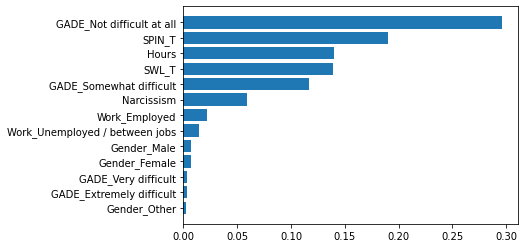

In [ ]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.rcParams['figure.figsize'] = [12, 10]
plt.show()

In [ ]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestRegressor(random_state=0),
      scoring='neg_mean_squared_error')

In [ ]:
selected_features = np.array(features)[rfe.get_support()]
selected_features

array(['Hours', 'Narcissism', 'SWL_T', 'SPIN_T',
       'GADE_Extremely difficult', 'GADE_Not difficult at all',
       'GADE_Somewhat difficult', 'Gender_Female', 'Gender_Male',
       'Work_Employed', 'Work_Unemployed / between jobs'], dtype=object)

# Part 3: Data Modelling


# Train - Test Split the data

In [ ]:
X = df_dummies_processed[['Hours', 'Narcissism', 'SWL_T', 'SPIN_T',
       'GADE_Extremely difficult', 'GADE_Not difficult at all',
       'GADE_Somewhat difficult', 'Gender_Female', 'Gender_Male',
       'Work_Employed', 'Work_Unemployed / between jobs']]

y = df_dummies_processed['GAD_cat']

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the sets data shapes
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (10074, 11)
y_train shape: (10074,)
X_test shape: (3358, 11)
y_test shape: (3358,)


In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#Training data
cols1 = ['Hours', 'Narcissism', 'SWL_T',	'SPIN_T']
cols2 = [ 'GADE_Extremely difficult', 'GADE_Not difficult at all',
       'GADE_Somewhat difficult', 'Gender_Female', 'Gender_Male',
       'Work_Employed', 'Work_Unemployed / between jobs']
X_num_train = X_train[cols1].copy()
train_index = X_num_train.index
X_num_train_scale=scaler.fit_transform(X_num_train)
X_num_train_scale = pd.DataFrame(X_num_train_scale)
X_num_train_scale.columns = cols1
X_num_train_scale.index = train_index
X_num_train_scale

# Testing data
X_num_test = X_test[cols1].copy()
test_index = X_num_test.index
X_num_test_scale = scaler.transform(X_num_test)
X_num_test_scale = pd.DataFrame(X_num_test_scale)
X_num_test_scale.columns = cols1
X_num_test_scale.index = test_index
X_num_test_scale

# Appending columns
X_train = X_num_train_scale.join(X_train[cols2])
X_train

X_test = X_num_test_scale.join(X_test[cols2])
X_test

,Hours,Narcissism,SWL_T,SPIN_T,GADE_Extremely difficult,GADE_Not difficult at all,GADE_Somewhat difficult,Gender_Female,Gender_Male,Work_Employed,Work_Unemployed / between jobs
11812,0.108696,0.00,0.700000,0.073529,0,0,1,0,1,0,1
1385,0.163043,0.00,0.833333,0.132353,0,1,0,0,1,0,0
11067,0.597826,0.00,0.566667,0.191176,0,1,0,0,1,0,1
2937,0.163043,0.25,0.766667,0.161765,0,1,0,0,1,0,0
4456,0.163043,0.25,0.800000,0.102941,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10741,0.652174,0.25,0.800000,0.455882,0,1,0,0,1,0,0
6359,0.054348,0.00,0.833333,0.029412,0,1,0,0,1,0,0
12068,0.543478,0.00,0.266667,0.411765,0,1,0,0,1,0,0
9724,0.217391,0.00,0.200000,0.220588,0,0,1,0,1,0,0



###1. CLASSIFICATION
Using 'GAD_cat' as the response variable, perofrming the following classification techniques:


Random Forest Classifier

In [ ]:
from sklearn.experimental import enable_halving_search_cv 

In [ ]:
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10],
             'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                     factor=2, resource='n_estimators',
                        max_resources=30).fit(X_train, y_train)
sh.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=24, random_state=0)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=24, random_state=0)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.6212030970815962


In [ ]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

                  precision    recall  f1-score   support

    Mild anxiety       0.43      0.49      0.46       925
 Minimal anxiety       0.75      0.84      0.79      1834
Moderate anxiety       0.34      0.11      0.17       418
  Severe Anxiety       0.46      0.28      0.34       181

        accuracy                           0.62      3358
       macro avg       0.49      0.43      0.44      3358
    weighted avg       0.59      0.62      0.60      3358



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Using gridsearchcv to increase model accuracy
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=26, random_state=42)

In [ ]:
decision_tree = tree.DecisionTreeClassifier(max_leaf_nodes=26, random_state=42)
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.620011911852293


Logistic Regression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
grid_result.best_estimator_

LogisticRegression(C=10, solver='newton-cg')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(C=10, solver='newton-cg')
model.fit(X_train, y_train)
#model.classes_
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))


0.6223942823108993


Ridge Classification

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
grid_result.best_estimator_

RidgeClassifier(alpha=0.1)

In [ ]:
rc = RidgeClassifier(alpha = 0.1).fit(X_train, y_train)
y_pred = rc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6209053007742704


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
grid.best_estimator_

In [ ]:
svm = SVC(C=1000, gamma=0.01).fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6185229303156641


Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
# define models and parameters
parameters = {
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[1,10,100]
}

# define grid search
cv = GridSearchCV(gbc,parameters,cv=5)
grid_result = cv.fit(X_train,y_train)
# summarize results
grid_result.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=250)

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=250).fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6220964860035736


### 2. Regression

In [ ]:
# Changing response variable to GAD_T
y = df_dummies_processed['GAD_T']
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#Training data
cols1 = ['Hours', 'Narcissism', 'SWL_T',	'SPIN_T']
cols2 = [ 'GADE_Extremely difficult', 'GADE_Not difficult at all',
       'GADE_Somewhat difficult', 'Gender_Female', 'Gender_Male',
       'Work_Employed', 'Work_Unemployed / between jobs']
X_num_train = X_train[cols1].copy()
train_index = X_num_train.index
X_num_train_scale=scaler.fit_transform(X_num_train)
X_num_train_scale = pd.DataFrame(X_num_train_scale)
X_num_train_scale.columns = cols1
X_num_train_scale.index = train_index
X_num_train_scale

# Testing data
X_num_test = X_test[cols1].copy()
test_index = X_num_test.index
X_num_test_scale = scaler.transform(X_num_test)
X_num_test_scale = pd.DataFrame(X_num_test_scale)
X_num_test_scale.columns = cols1
X_num_test_scale.index = test_index
X_num_test_scale

# Appending columns
X_train = X_num_train_scale.join(X_train[cols2])
X_train

X_test = X_num_test_scale.join(X_test[cols2])
X_test

,Hours,Narcissism,SWL_T,SPIN_T,GADE_Extremely difficult,GADE_Not difficult at all,GADE_Somewhat difficult,Gender_Female,Gender_Male,Work_Employed,Work_Unemployed / between jobs
11812,0.108696,0.00,0.700000,0.073529,0,0,1,0,1,0,1
1385,0.163043,0.00,0.833333,0.132353,0,1,0,0,1,0,0
11067,0.597826,0.00,0.566667,0.191176,0,1,0,0,1,0,1
2937,0.163043,0.25,0.766667,0.161765,0,1,0,0,1,0,0
4456,0.163043,0.25,0.800000,0.102941,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10741,0.652174,0.25,0.800000,0.455882,0,1,0,0,1,0,0
6359,0.054348,0.00,0.833333,0.029412,0,1,0,0,1,0,0
12068,0.543478,0.00,0.266667,0.411765,0,1,0,0,1,0,0
9724,0.217391,0.00,0.200000,0.220588,0,0,1,0,1,0,0


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_score = r2_score(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared = False)
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)
print("R2 Score : ", lr_score)
print("RMSE : ", lr_rmse)

Coefficients:  [ 0.27583548  0.7970441  -2.98479575  5.06673842  2.81423616 -6.74174314
 -3.72380634 -1.15782266 -1.93604135  0.04087686 -0.20913455]
Intercept:  11.614773196639874
R2 Score :  0.4625011826296004
RMSE :  3.4395695594140467


Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = Lasso(alpha = 0.04).fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
print("R2 Score : ", r2_score(y_test, y_pred))
print("RMSE : ", mean_squared_error(y_test, y_pred, squared = False))

R2 Score :  0.46041891584824624
RMSE :  3.44622555392498
